<a href="https://colab.research.google.com/github/TaeMD/ML-projects/blob/main/Doctors%20appointment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pwd

'/content'

In [3]:
df_total = pd.read_csv('/content/drive/MyDrive/appointment.csv')

In [4]:
df_total.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
df_total.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [7]:
df = df_total.drop(['PatientId', 'AppointmentID'], axis = 1)

In [8]:
df= df.rename(columns={'Neighbourhood':'Neighborhood',  'Hipertension':'Hypertension', 'Handcap':'Handycap'})

Time Series Analisys

In [9]:
df[['ScheduledDay','AppointmentDay']].head() 

,ScheduledDay,AppointmentDay
0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z
1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z
2,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z
3,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z
4,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z


In [10]:
pd.to_datetime(df['ScheduledDay'])

0        2016-04-29 18:38:08+00:00
1        2016-04-29 16:08:27+00:00
2        2016-04-29 16:19:04+00:00
3        2016-04-29 17:29:31+00:00
4        2016-04-29 16:07:23+00:00
                    ...           
110522   2016-05-03 09:15:35+00:00
110523   2016-05-03 07:27:33+00:00
110524   2016-04-27 16:03:52+00:00
110525   2016-04-27 15:09:23+00:00
110526   2016-04-27 13:30:56+00:00
Name: ScheduledDay, Length: 110527, dtype: datetime64[ns, UTC]

In [11]:
df['ScheduledDay']=df['ScheduledDay'].astype('datetime64[ns]')

In [12]:
df['AppointmentDay'] = df['AppointmentDay'].astype('datetime64[ns]')

In [16]:
df['AppointmentDate'] = df['AppointmentDay'].dt.date

In [17]:
df['ScheduledDateofMonth'] = df['ScheduledDay'].dt.day

In [18]:
df['ScheduledMonth'] = df['ScheduledDay'].dt.month

In [19]:
df['ScheduledHour'] = df['ScheduledDay'].dt.hour

In [20]:
df['ScheduledWeekday'] = df['ScheduledDay'].dt.weekday

In [31]:
df['ScheduledDate'] = df['ScheduledDay'].dt.date

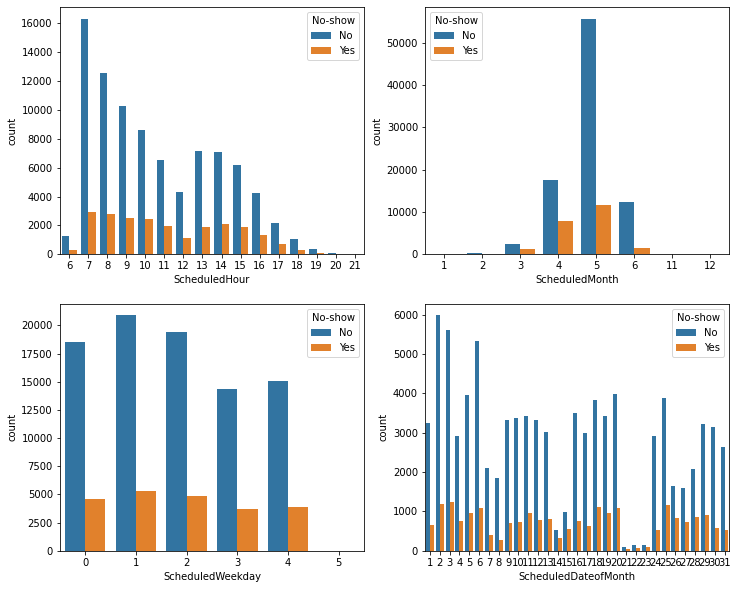

In [23]:
from matplotlib import axes
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12, 10)

sns.countplot(data=df, x='ScheduledHour',hue='No-show', ax=axes[0,0])
sns.countplot(data=df, x='ScheduledMonth',hue='No-show', ax=axes[0,1])
sns.countplot(data=df, x='ScheduledWeekday',hue='No-show', ax=axes[1,0])
sns.countplot(data=df, x='ScheduledDateofMonth',hue='No-show', ax=axes[1,1])

In [24]:
df['ScheduledHour'] 

0         18
1         16
2         16
3         17
4         16
          ..
110522     9
110523     7
110524    16
110525    15
110526    13
Name: ScheduledHour, Length: 110527, dtype: int64

In [25]:
len(df[df['ScheduledHour'] < 12])

68481

In [26]:
len(df[df['ScheduledHour'] >= 12])

42046

In [27]:
def time(x):
  if x <=12:
    return 'Morning'
  else:
    return 'Afternoon'

In [28]:
df['ScheduledTime']=df['ScheduledHour'].apply(time)

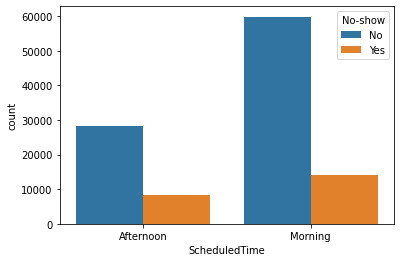

In [29]:
sns.countplot(data=df, x='ScheduledTime', hue='No-show')

##It is quite clear that patients who had appointments in the morning much more likely showed up for their appointments than patients who had appointments in the afternoon.

In [32]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handycap,SMS_received,No-show,AppointmentDate,ScheduledDateofMonth,ScheduledMonth,ScheduledHour,ScheduledWeekday,ScheduledTime,ScheduledDate
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,29,4,18,4,Afternoon,2016-04-29
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,29,4,16,4,Afternoon,2016-04-29
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,29,4,16,4,Afternoon,2016-04-29
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,29,4,17,4,Afternoon,2016-04-29
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,29,4,16,4,Afternoon,2016-04-29


In [33]:
df['waiting_time'] =df['AppointmentDate'] - df['ScheduledDate']

In [34]:
df['waiting_time']

0         0 days
1         0 days
2         0 days
3         0 days
4         0 days
           ...  
110522   35 days
110523   35 days
110524   41 days
110525   41 days
110526   41 days
Name: waiting_time, Length: 110527, dtype: timedelta64[ns]

In [35]:
len(df)

110527

In [38]:
df[df['waiting_time'] < '0 days']

,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handycap,SMS_received,No-show,AppointmentDate,ScheduledDateofMonth,ScheduledMonth,ScheduledHour,ScheduledWeekday,ScheduledTime,ScheduledDate,waiting_time
27033,M,2016-05-10 10:51:53,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,2016-05-09,10,5,10,1,Morning,2016-05-10,-1 days
55226,F,2016-05-18 14:50:41,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,2016-05-17,18,5,14,2,Afternoon,2016-05-18,-1 days
64175,F,2016-05-05 13:43:58,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,2016-05-04,5,5,13,3,Afternoon,2016-05-05,-1 days
71533,F,2016-05-11 13:49:20,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,2016-05-05,11,5,13,2,Afternoon,2016-05-11,-6 days
72362,M,2016-05-04 06:50:57,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,2016-05-03,4,5,6,2,Morning,2016-05-04,-1 days


In [44]:
df.loc[df['waiting_time'] < '0 days'].index

Int64Index([27033, 55226, 64175, 71533, 72362], dtype='int64')

In [46]:
df.drop(df.loc[df['waiting_time'] < '0 days'].index, axis=0, inplace=True) #. Dropping the rows with minus waiting time.

In [47]:
df[df['waiting_time'] < '0 days']

,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handycap,SMS_received,No-show,AppointmentDate,ScheduledDateofMonth,ScheduledMonth,ScheduledHour,ScheduledWeekday,ScheduledTime,ScheduledDate,waiting_time


In [48]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handycap,SMS_received,No-show,AppointmentDate,ScheduledDateofMonth,ScheduledMonth,ScheduledHour,ScheduledWeekday,ScheduledTime,ScheduledDate,waiting_time
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,29,4,18,4,Afternoon,2016-04-29,0 days
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,29,4,16,4,Afternoon,2016-04-29,0 days
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,29,4,16,4,Afternoon,2016-04-29,0 days
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,29,4,17,4,Afternoon,2016-04-29,0 days
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,29,4,16,4,Afternoon,2016-04-29,0 days


In [49]:
df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighborhood',
       'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handycap',
       'SMS_received', 'No-show', 'AppointmentDate', 'ScheduledDateofMonth',
       'ScheduledMonth', 'ScheduledHour', 'ScheduledWeekday', 'ScheduledTime',
       'ScheduledDate', 'waiting_time'],
      dtype='object')

Categorical features EDA

In [58]:
df['Neighborhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4430
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighborhood, Length: 81, dtype: int64

In [66]:
df['Neighborhood'].unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

In [100]:
perc = {}
perc_list = []
def no_show_perc (col):
  for i in df[col].unique():
    value = np.round(len(df[(df[col] == i)&(df['No-show']=='Yes')] )/ len(df[df[col] == i]) * 100)
    perc_list.append(value)
    perc[i] = value

In [101]:
no_show_perc('Neighborhood')

In [99]:
perc

{'AEROPORTO': 12.0,
 'ANDORINHAS': 23.0,
 'ANTÔNIO HONÓRIO': 18.0,
 'ARIOVALDO FAVALESSA': 22.0,
 'BARRO VERMELHO': 22.0,
 'BELA VISTA': 20.0,
 'BENTO FERREIRA': 22.0,
 'BOA VISTA': 19.0,
 'BONFIM': 20.0,
 'CARATOÍRA': 23.0,
 'CENTRO': 21.0,
 'COMDUSA': 18.0,
 'CONQUISTA': 19.0,
 'CONSOLAÇÃO': 17.0,
 'CRUZAMENTO': 22.0,
 'DA PENHA': 19.0,
 'DE LOURDES': 15.0,
 'DO CABRAL': 16.0,
 'DO MOSCOSO': 22.0,
 'DO QUADRO': 16.0,
 'ENSEADA DO SUÁ': 22.0,
 'ESTRELINHA': 20.0,
 'FONTE GRANDE': 22.0,
 'FORTE SÃO JOÃO': 18.0,
 'FRADINHOS': 19.0,
 'GOIABEIRAS': 20.0,
 'GRANDE VITÓRIA': 20.0,
 'GURIGICA': 23.0,
 'HORTO': 24.0,
 'ILHA DAS CAIEIRAS': 22.0,
 'ILHA DE SANTA MARIA': 19.0,
 'ILHA DO BOI': 9.0,
 'ILHA DO FRADE': 20.0,
 'ILHA DO PRÍNCIPE': 23.0,
 'ILHAS OCEÂNICAS DE TRINDADE': 100.0,
 'INHANGUETÁ': 19.0,
 'ITARARÉ': 26.0,
 'JABOUR': 18.0,
 'JARDIM CAMBURI': 19.0,
 'JARDIM DA PENHA': 16.0,
 'JESUS DE NAZARETH': 24.0,
 'JOANA D´ARC': 18.0,
 'JUCUTUQUARA': 19.0,
 'MARIA ORTIZ': 21.0,
 'MARUÍPE': 

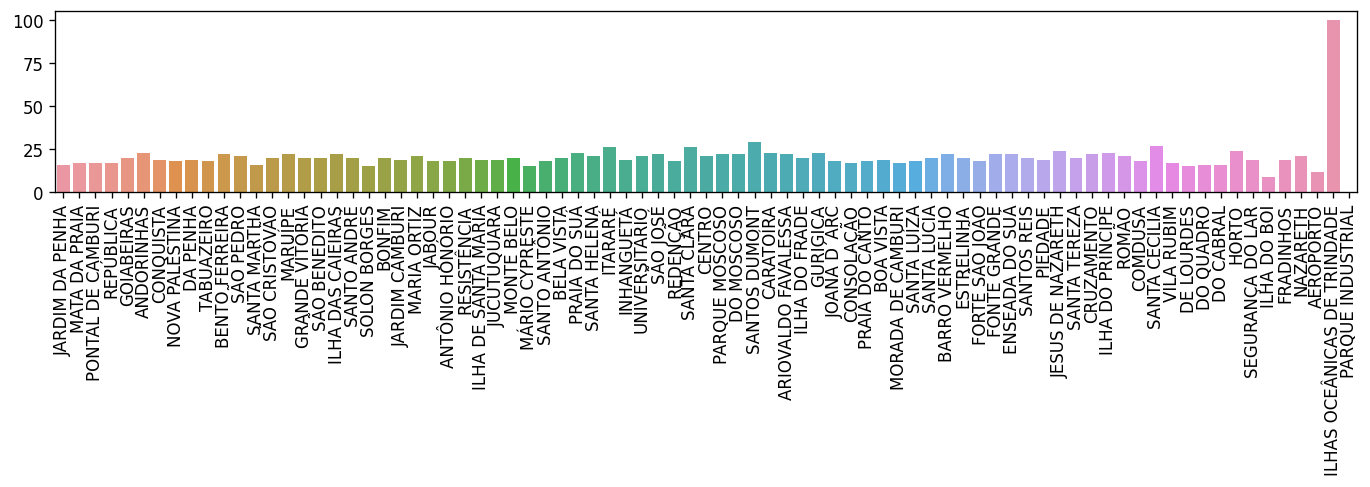

In [102]:
plt.figure(figsize=(14,2), dpi=120)
sns.barplot(x=df['Neighborhood'].unique(),y=perc_list)
plt.xticks(rotation=90);

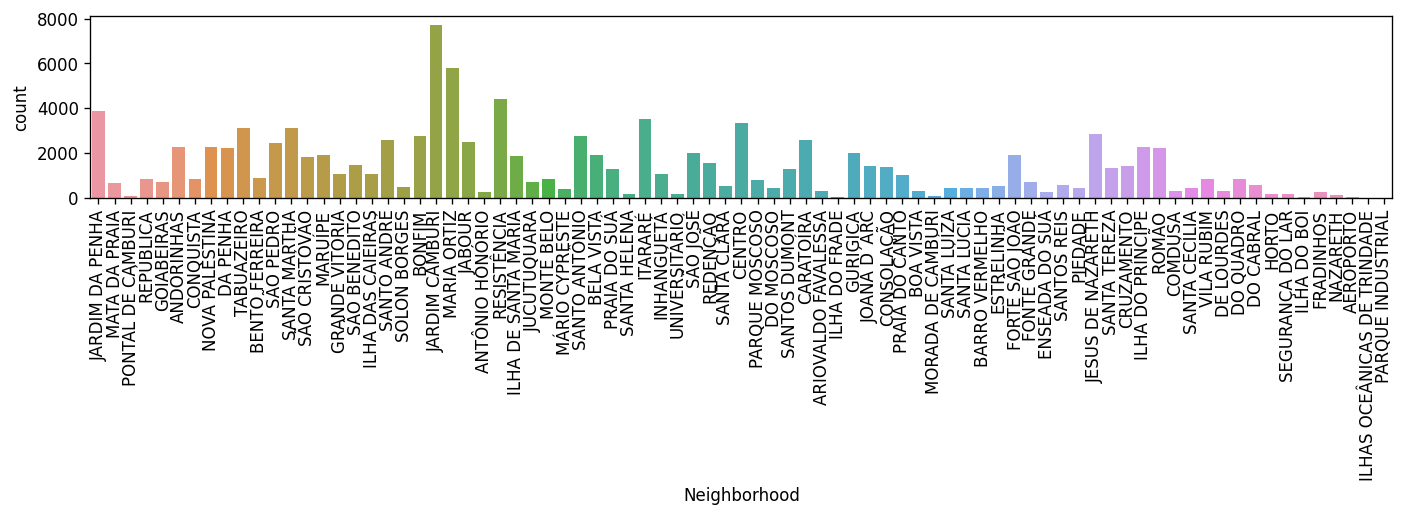

In [92]:
plt.figure(figsize=(14,2), dpi=120)
sns.countplot(data=df, x='Neighborhood')
plt.xticks(rotation=90);

In [103]:
#. Majority of the neighborhoods have around 20% of no_show rate except few neighborhoods which have small numbers of total appointments. It seems that Neighborhood is not an important feature to predict the now_show rate so will drop the column.